In [ ]:
import os
import tarfile
import urllib

In [ ]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/rickiepark/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [ ]:
fetch_housing_data()

In [ ]:
import pandas as pd

## pandas 사용해서, 모든 데이터 담은 데이터프레임 반환.

def load_housing_data(housing_path = HOUSING_PATH):
    csv_path = os.path.join(housing_path, 'housing.csv')
    return pd.read_csv(csv_path)

In [ ]:
housing = load_housing_data()

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
import numpy as np

housing['income_cat'] = pd.cut(housing['median_income'],
                               bins = [0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels = [1,2,3,4,5])

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42) #계층 샘플링 StratifiedShuffleSplit

for train_index, test_index in split.split(housing, housing["income_cat"]): # 아까 따로 추출해준, 'income_cat'을 기준으로
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           20640 non-null  float64 
 1   latitude            20640 non-null  float64 
 2   housing_median_age  20640 non-null  float64 
 3   total_rooms         20640 non-null  float64 
 4   total_bedrooms      20433 non-null  float64 
 5   population          20640 non-null  float64 
 6   households          20640 non-null  float64 
 7   median_income       20640 non-null  float64 
 8   median_house_value  20640 non-null  float64 
 9   ocean_proximity     20640 non-null  object  
 10  income_cat          20640 non-null  category
dtypes: category(1), float64(9), object(1)
memory usage: 1.6+ MB


housing 데이터 다시 생성.

이제부터 데이터 전처리.
<br>
데이터 전처리를 할 때, 함수로 만들어야 하는 이유
<br>
1. 데이터 변환을 손쉽게 변환(새로운 데이터 가져올 때)
<br>
2. 변환 라이브러리, 점진적 구축 가능.
<br>
3. 새로운 데이터 넣기 전에, 변환하는데 유리
<br>
4. 어떤 조합이 좋은지 확인 편리.

In [ ]:
housing = strat_train_set.drop('median_house_value', axis = 1)
housing_labels = strat_train_set['median_house_value'].copy()

예측 변수, 레이블 분리.
housing에는 'median_house_value'만 없는 모든 데이터, housing_labels는 'median_house_value'만 있는 데이터.

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           16512 non-null  float64 
 1   latitude            16512 non-null  float64 
 2   housing_median_age  16512 non-null  float64 
 3   total_rooms         16512 non-null  float64 
 4   total_bedrooms      16354 non-null  float64 
 5   population          16512 non-null  float64 
 6   households          16512 non-null  float64 
 7   median_income       16512 non-null  float64 
 8   ocean_proximity     16512 non-null  object  
 9   income_cat          16512 non-null  category
dtypes: category(1), float64(8), object(1)
memory usage: 1.3+ MB


In [ ]:
housing.dropna(subset = ['total_bedrooms']) # NaN값만 제거.
housing.drop('total_bedrooms', axis = 1) # 전체 특성 제거.
median = housing['total_bedrooms'].median() #중간값.
housing['total_bedrooms'].fillna(median, inplace = True) #그걸 NaN값에 채워 넣기.

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'median')

SimpleImputer는 NaN값 다루기 쉽게.
<br>
'median'값을 NaN값에 채워넣고, 그걸 imputer로.
<br>
미세조정은 쫌 어려워 보인다.

In [ ]:
housing_num = housing.drop('ocean_proximity', axis = 1)

'ocean_proximity'가 혼자 object형태여서, 버려줌

In [ ]:
imputer.fit(housing_num) #fit()함수 써서, 위에 drop한 housing_num 데이터에 적용.

SimpleImputer(strategy='median')

In [ ]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155,    3.     ])

In [ ]:
housing_num.median().values

<ipython-input-17-8050cbb6f664>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  housing_num.median().values


array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [ ]:
housing_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           16512 non-null  float64 
 1   latitude            16512 non-null  float64 
 2   housing_median_age  16512 non-null  float64 
 3   total_rooms         16512 non-null  float64 
 4   total_bedrooms      16512 non-null  float64 
 5   population          16512 non-null  float64 
 6   households          16512 non-null  float64 
 7   median_income       16512 non-null  float64 
 8   income_cat          16512 non-null  category
dtypes: category(1), float64(8)
memory usage: 1.1 MB


In [ ]:
X = imputer.transform(housing_num)

imputer로 누락값을 중간값으로 변경.

In [ ]:
housing_tr = pd.DataFrame(X, columns = housing_num.columns,
                          index = housing_num.index)

위에 변경해준 것을, DataFrame형태로 변환.

-사이킷런 철학-
<br>
<h3> 일관성 </h3>
<br>
추정기: 데이터셋을 기반으로 모델파라미터들 추정하는 객체.(ex. imputer객체, fit에 의해 수행.)
<br> 변환기: 데이터셋을 변환하는 추정기,(ex. transform())
<br> 예측기: 예측을 만드는 것.(ex. LinearRegression, predict() 메서드.)
<br>
<br>
<h3> 검사 기능 </h3>: 인스턴스 변수로 직접 접근 가능, 밑줄 붙여서 공개 인스턴스 변수로 제공.
<br>
<br>
<h3> 클래스 남용 방지 </h3> : 데이터셋을 클래스가 아닌, 넘파이, 사이파이 희소 행렬로 표현.
<br>
<br>
<h3> 조합성 </h5> :기존의 것을 최대한 재사용.
<br>
<br>
<h5> 합리적 기본값 </h5> : 사이킷런은 대부분의 매개변수에 합리적 기본값을 지정해둠.

In [ ]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


[ ] -> 시리즈 객체(1차원 배열)
<br>
[[ ]] -> DataFrame 형태.

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

OrdinalEncoder 클래스 사용, 기존 텍스트 형태, 숫자로 변환. 

In [ ]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

categories_로 뭐가 무엇인지 확인.
<br>0 -> 1H OCEAN
<br>1 -> INLAND
<br>2 -> ISLAND
<br>3 -> NEAR BAY
<br>4 -> NEAR OCEAN

In [ ]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

원-핫 인코딩: 한 특성만 1, 나머지는 전부 0으로 바꿔버리는 것.
<br>
이렇게 나온 새로운 특성을 더미(dummy)
<br>
사이킷런에서 제공하는 OneHotEncoder로 가능.

In [ ]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

위에 것을 보면, 희소행렬(위치만 저장).
<br>
그래서 넘파이 배열로 바꿔주었는데, toarray() 호출하면 가능.

In [ ]:
cat_encoder.categories_ #다시 categories_로 확인.

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin


rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):  #기본값 추가.
        self.add_bedrooms_per_room = add_bedrooms_per_room
    
    #fit단계에서는 따로 할게 없다.
    def fit(self, X, y=None):
        return self  #self반환.
    
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household] #c_함수, 합치는 함수.

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False) 
housing_extra_attribs = attr_adder.transform(housing.to_numpy()) #책에는 housing.values라고 나와있는데, numpy()로 해줘서 바로 특성 추가.

좀더 편리한 작업을 위해, 따로 변환기 생성.

-특성 스케일링-
<br>입력 숫자 특성들의 스케일이 많이 다르면 잘 작동하지 않음. 이 범위를 같도록 맞춰주는 것.
<br>
1. min-max 스케일링(정규화):[min,max] - Min = [0, min - max] / (min,max) -> [0,1]. 0~1 범위에 들도록 조정. MinMaxScaler변환기.
<br>
2. standardization(표준화): 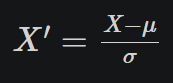
분산이 1이 되도록 조정. 상한,하한 없어서 좋을 수도 안좋을 수도. StandardScaler 변환기
<br>
<br>
스케일링은, 훈련 데이터에 대해서만 fit()적용.
<br> 그 다음, 새로운 데이터에 대해 transform적용.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")), 
        ('attribs_adder', CombinedAttributesAdder()), #아까 class 만들어 준 것.
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [ ]:
housing_num_tr

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.01739526,
         0.00622264, -0.12112176],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.56925554,
        -0.04081077, -0.81086696],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.01802432,
        -0.07537122, -0.33827252],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.5092404 ,
        -0.03743619,  0.32286937],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.32814891,
        -0.05915604, -0.45702273],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.01407228,
         0.00657083, -0.12169672]])

pipeLine. 연속된 변환을 순서대로 처리할 수 있게끔 해주는 것.

In [ ]:
from sklearn.compose import ColumnTransformer # 열 변환기

num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs),
])

housing_prepared = full_pipeline.fit_transform(housing)

In [ ]:
housing_prepard

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

이제 전처리 끝. 
<br>훈련, 평가 시작

In [ ]:
from sklearn.linear_model import LinearRegression

Lin_reg = LinearRegression()
Lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

선형회귀 적용.

In [ ]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]

some_data_prepared = full_pipeline.transform(some_data)
print("예측: ", Lin_reg.predict(some_data_prepared))

print("레이블: ", list(some_labels))

예측:  [ 83811.08312039 314388.27147935 145641.85902864 183704.64921202
 238729.66725745]
레이블:  [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


확인 결과. 조금 차이가 있음.

In [ ]:
from sklearn.metrics import mean_squared_error

housing_predictions = Lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68376.51254853733

RMSE 측정. 오차범위 68376 정도. 훈련데이터에 '과소적합'

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(random_state=42)

또다른 것(DecisionTreeRegressor) 적용

In [ ]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

오차범위 0.0
<br>
이건 '과대적합'.
<br>
<br>
그러므로 '교차검증'(훈련세트, 검증세트 나누고 훈련, 그 후에 평가) 실시. train_test_split

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10) #scoring은 낮을 수록 좋은. 근데 클 수록 좋은 것이 필요해서 "neg_mean_squared_error" 사용.
tree_rmse_scores = np.sqrt(-scores) # 그래서 루트 계산 전에 -부호로.

k-fold cross-validation 검증. 10개의 무작위 분할(cv = 10)
<br>
총 10번 훈련, 평가. 매번 다른 폴드(1개) 선택해서 평가에 사용. 나머지 9개는 훈련에 사용.

In [ ]:
def display_scores(scores):
    print("점수:", scores)
    print("평균:", scores.mean())
    print("표준 편차:", scores.std())

display_scores(tree_rmse_scores)

점수: [72237.45096271 69208.53094621 69286.11573206 70612.13634405
 70577.30202088 76840.97092314 71823.83279699 72710.22512908
 67780.77127665 71678.17802175]
평균: 71275.55141535088
표준 편차: 2362.02756776275


In [ ]:
Lin_scores = cross_val_score(Lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-Lin_scores)
display_scores(lin_rmse_scores)

점수: [71523.78333874 64044.46774989 67454.97869698 68514.10137273
 66303.62531226 72166.63405138 74464.08841381 68570.11804395
 66063.64175868 69870.86192291]
평균: 68897.63006613276
표준 편차: 3002.746127534861


 확실히 교차검증 결과가 더 좋음.
<br>
근데 비용때문에 항상 쓸 수 있는것은 아님.

모델 앙상블 학습(여러 특성우에서 무작위로 선택해서 예측하고 그걸 평균.)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(random_state=42)

In [ ]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18675.224916252282

In [ ]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

점수: [51553.65292335 48797.89565614 47005.23947642 52046.73567245
 47700.78025873 51824.08544879 52582.59165129 49949.79025967
 48680.25622229 54019.67674791]
평균: 50416.070431704204
표준 편차: 2201.612779754884


조금 더 좋은 성능. 그래도 아직 과대적합.
<br>
-과대적합 막는 법-
<br>
1. 모델 간단히
2. 제한(규제)
3. 데이터 더 많이. 모으기

<br>
<br>
여러 가지를 다 사용해봐야 알 수 있음.

-세부 튜닝-

<br>
그리드 서치: 순차적으로 입력 후, 가장 높은 성능 보이는 하이퍼파라미터 탐색(시간 오래 걸림) GridSearchCV
<br>
랜덤 서치: 하이퍼파라미터 값 랜덤하게 넣고, 값 좋은 거 따와서 모델 생성(불필요한 탐색 횟수 감소) RandomizedSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
        {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, # 3 * 4 = 12번
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}, # 2 * 3 -> 6번 
  ] #총 18번 탐색시도.

forest_reg = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, #총 5겹 검증 시도. 18*5 = 90번 훈련 진행.
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

최상의 하이퍼파라미터 값. -> best_params_.
<br>
max_features: 6
<br>
n_estimators: 30

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30, random_state=42)

최적 추정기 접근: best_estimator_

In [ ]:
cvres = grid_search.cv_results_

for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64794.30269596007 {'max_features': 2, 'n_estimators': 3}
56170.628706376316 {'max_features': 2, 'n_estimators': 10}
53112.07892952066 {'max_features': 2, 'n_estimators': 30}
61836.14128922096 {'max_features': 4, 'n_estimators': 3}
54015.050600771814 {'max_features': 4, 'n_estimators': 10}
51501.312925751794 {'max_features': 4, 'n_estimators': 30}
59654.781331729675 {'max_features': 6, 'n_estimators': 3}
52654.921131020776 {'max_features': 6, 'n_estimators': 10}
50743.74265388978 {'max_features': 6, 'n_estimators': 30}
60051.26348940765 {'max_features': 8, 'n_estimators': 3}
52909.31100796091 {'max_features': 8, 'n_estimators': 10}
50800.78516244517 {'max_features': 8, 'n_estimators': 30}
63176.30025923348 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54596.210174483705 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60999.682580275425 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
53236.2602917408 {'bootstrap': False, 'max_features': 3, 'n_estimator

최적의 솔루션: 'max_features': 6, 'n_estimators': 30. 점수도 가장 좋음.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f07703fd2e0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f07703f1a90>},
                   random_state=42, scoring='neg_mean_squared_error')

In [ ]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

49799.635737761106 {'max_features': 7, 'n_estimators': 180}
52293.114093913726 {'max_features': 5, 'n_estimators': 15}
51327.353255586764 {'max_features': 3, 'n_estimators': 72}
51528.97117998048 {'max_features': 5, 'n_estimators': 21}
49958.42482333546 {'max_features': 7, 'n_estimators': 122}
51270.531241462595 {'max_features': 3, 'n_estimators': 75}
51172.437672640175 {'max_features': 3, 'n_estimators': 88}
50255.14987044715 {'max_features': 5, 'n_estimators': 100}
50894.38729795359 {'max_features': 3, 'n_estimators': 150}
65022.070435017646 {'max_features': 5, 'n_estimators': 2}


랜덤 서치. 하이퍼파라미터 탐색 공간이 커지면, 랜덤서치가 더 좋음.
<br>
그리드 서치처럼 모든 조합 다 시도하는 것과는 다른, 각 반복마다 임의로 적용해서, 평가.

In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([6.76445809e-02, 6.24744883e-02, 4.48349664e-02, 1.82692423e-02,
       1.78441912e-02, 1.96046284e-02, 1.81345873e-02, 2.43728155e-01,
       1.64552239e-01, 5.15312129e-02, 1.00601503e-01, 5.56925429e-02,
       1.39077386e-02, 1.13027019e-01, 8.79969201e-05, 2.68765993e-03,
       5.37724723e-03])

최상 모델 분석.

In [ ]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]

cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs

sorted(zip(feature_importances, attributes), reverse=True) #특성 중요도, 특성 이름 한 쌍으로 내림차순 정렬.

[(0.24372815503486656, 'median_income'),
 (0.164552239433468, 'income_cat'),
 (0.11302701921836562, 'INLAND'),
 (0.1006015031515756, 'pop_per_hhold'),
 (0.06764458085326612, 'longitude'),
 (0.062474488288322035, 'latitude'),
 (0.055692542877701014, 'bedrooms_per_room'),
 (0.051531212925316115, 'rooms_per_hhold'),
 (0.04483496644921273, 'housing_median_age'),
 (0.019604628363310554, 'population'),
 (0.018269242313755225, 'total_rooms'),
 (0.018134587277114467, 'households'),
 (0.01784419116603477, 'total_bedrooms'),
 (0.013907738567035368, '<1H OCEAN'),
 (0.005377247230746392, 'NEAR OCEAN'),
 (0.0026876599298535937, 'NEAR BAY'),
 (8.799692005595001e-05, 'ISLAND')]

중요도. 특성 이름 표시.

In [ ]:
final_model = grid_search.best_estimator_ #그리드 서치에서 가장 좋았던 것, 최종 모델로.

X_test = strat_test_set.drop("median_house_value", axis=1) 
y_test = strat_test_set["median_house_value"].copy()
# 테스트 세트, 레이블 따로 분류. 각각 X_test, y_test로.

X_test_prepared = full_pipeline.transform(X_test) # fit()안쓰는것 확인.

final_predictions = final_model.predict(X_test_prepared)

#오차 측정.
final_mse = mean_squared_error(y_test, final_predictions) # MSE
final_rmse = np.sqrt(final_mse) # RMSE


In [ ]:
final_rmse

48557.33618531538

In [ ]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([46608.81069751, 50430.63116986])

오차 95% '신뢰구간' 계산, 확률적 시스템 성능 예측 가능. scipy.stats.t.interval() 

-론칭, 모니터링, 시스템 유지 보수-
<br>
론칭 허가 받으면, 배포.
<br>
-배포:
1. 전체 파이프라인, 예측 파이프라인 포함된 훈련된 사이킷런 모델 저장
2. 이 모델을 상용환경에 로드, predict()메서드 호출해서 예측.
<br>
-모니터링 & 유지보수:
<br>
하위 시스템의 지표로 모델 성능 추정.(모델이 분류한 전체 사진 중에서 한 샘플 보내는 등). 어떤 식으로든 모니터링 시스템이 필요.
1. 데이터 수집, 레이블 달기
2. 모델 훈련, 하이퍼파라미터 자동으로 튜닝하는 스크립트 작성
3. 새로운 모델, 이전 모델 평가하는 스크립트 작성. 성능 감소하지 않으면 배포.

<br>
마지막으로 만든 모델을 백업, 뭔가 잘못됐다 판단되면 롤백 위한 절차 & 도구 준비.
